

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 


## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [2]:
import numpy as np

**1.** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [1]:
def max_element(arr):
    zeros = np.argwhere(arr[:-1] == 0)
    zeros = zeros + 1
    return np.max(arr[zeros])

In [21]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_element(x)

5

**2. ** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [16]:
def nearest_value(X, v):
    Y = np.abs(X - v)
    arg = np.argmin(Y)
    return X.flat[arg]

In [17]:
X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4

**3. ** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [3]:
def scale(X):
    means = np.mean(X, axis = 0)
    Y = X - means
    stds = np.std(Y, axis = 0) +1e-7
    return Y / stds


In [12]:
np.random.seed(1)
X = np.random.randint(0, 10, (3, 3))
print(X)
scale(X)

[[5 8 9]
 [5 0 0]
 [1 7 6]]


array([[ 0.70710674,  0.84292721,  1.06904494],
       [ 0.70710674, -1.40487868, -1.33630617],
       [-1.41421349,  0.56195147,  0.26726123]])

**4.** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [13]:
def get_stats(X):
    detect = np.linalg.det(X)
    trace = np.trace(X)
    mx = np.max(X)
    mn = np.min(X)
    norm = np.linalg.norm(X)
    eigen_values = np.linalg.eigvals(X)
    inverse_matrix = np.linalg.inv(X)
    return detect, trace, mx, mn, norm, eigen_values, inverse_matrix

In [16]:
np.random.seed(1)
X = np.random.normal(1, 2, (3, 3))
print(X)

det, trace, mx, mn, norm, eigen_values, inverse_matrix = get_stats(X)
print(det)
print(trace)
print(mx, mn)
print(eigen_values)
print(inverse_matrix)

[[ 4.24869073 -0.22351283 -0.0563435 ]
 [-1.14593724  2.73081526 -3.60307739]
 [ 4.48962353 -0.5224138   1.63807819]]
14.86146452450509
8.617584178090038
4.4896235284329595 -3.6030773937605654
[4.95367812 2.4285811  1.23532495]
[[ 0.17434295  0.0266169   0.06454261]
 [-0.96217477  0.48532557  1.03441539]
 [-0.78469245  0.08182816  0.76346835]]


**5.** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [17]:
for exp_num in range(100):
    X = np.random.normal(1, 10, (3, 3))
    Y = np.random.normal(1, 10, (3, 3))
print(X.dot(Y.T))

[[ 110.07265342   51.70989307  317.94635127]
 [ 200.37248859  287.64878702  524.71732839]
 [ -86.43584463 -138.80948283  309.92484792]]


In [18]:
maxs = []
for exp_num in range(100):
    X = np.random.normal(1, 10, (10, 10))
    Y = np.random.normal(1, 10, (10, 10))
    mul = X.dot(Y)
    maxs.append(np.max(mul))
print(np.mean(maxs))
print(np.quantile(maxs, 0.95))

872.000858975618
1237.038159487295


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [3]:
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70000 non-null  int64  
 1   Month              70000 non-null  int64  
 2   DayofMonth         70000 non-null  int64  
 3   DayOfWeek          70000 non-null  int64  
 4   DepTime            68601 non-null  float64
 5   CRSDepTime         70000 non-null  int64  
 6   ArrTime            68444 non-null  float64
 7   CRSArrTime         70000 non-null  int64  
 8   UniqueCarrier      70000 non-null  object 
 9   FlightNum          70000 non-null  int64  
 10  TailNum            69180 non-null  object 
 11  ActualElapsedTime  68418 non-null  float64
 12  CRSElapsedTime     69991 non-null  float64
 13  AirTime            68418 non-null  float64
 14  ArrDelay           68418 non-null  float64
 15  DepDelay           68601 non-null  float64
 16  Origin             700

**6.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [22]:
df.value_counts('CancellationCode').index[0]

'A'

**7.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [39]:
df.Distance.min(), df.Distance.mean(), df.Distance.max()

(31, 724.5082571428571, 4962)

**8.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [31]:
df[df.Distance == 31][['FlightNum', 'DayOfWeek', 'DayofMonth']]

,FlightNum,DayOfWeek,DayofMonth
1116,65,2,30
6958,65,5,26
17349,64,1,18
27534,64,2,11
46082,65,6,9
48112,64,4,28


**9.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [33]:
df.Origin.value_counts().index[0]

'ATL'

**10.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [34]:
df.groupby('Origin')[['AirTime']].mean().sort_values('AirTime', ascending=False).iloc[:1]

,AirTime
Origin,
SJU,205.2


**11.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [41]:
filtered = df.groupby('Origin').filter(lambda x: x['Origin'].count() < 1000)
filtered[filtered.DepDelay > 0].groupby('Origin').count().sort_values('FlightNum', ascending=False).iloc[:1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Origin,,,,,,,,,,,,,,,,,,,,,
MDW,446,446,446,446,446,446,445,446,446,446,...,445,446,446,0,446,190,190,190,190,190


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [5]:
df = pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [47]:
df.isna().sum().sum() #всего пропущенных элементов в таблицу "объект-признак"

355215

In [48]:
(df.isna().sum() > 0).sum() #обектов имеют один пропуск

16

In [49]:
(df.isna().sum(axis=1) > 0).sum() #признаков имеют одно пропущенное значение

70000

In [6]:
print(f'Есть пропущенные значения в целевой переменной: {df.DepDelay.hasnans}')

Есть пропущенные значения в целевой переменной: True


In [7]:
with_target_missed = df[df.DepDelay.isna()]
with_target_missed

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [10]:
df1 = df[~(df.DepDelay.isna() | df.DepDelay == 0)]
df1.DepDelay.hasnans

True

**13.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [11]:
for feature in ['DepTime', 'CRSDepTime', 'ArrTime' , 'CRSArrTime']:

    df1[f'{feature}_Hour'] = df[feature]
    df1[f'{feature}_Hour'][~df1[feature].isna()] = df1[~df1[feature].isna()][feature].astype(int) // 100
    df1[f'{feature}_Minute'] = df[feature]
    df1[f'{feature}_Minute'] = df1[~df1[feature].isna()][feature].astype(int) % 100
    df1.drop(feature, inplace=True, axis=1)

<ipython-input-11-9ef4606eef68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[f'{feature}_Hour'] = df[feature]
<ipython-input-11-9ef4606eef68>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[f'{feature}_Hour'][~df1[feature].isna()] = df1[~df1[feature].isna()][feature].astype(int) // 100
C:\Users\Bodym\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [12]:
df1

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9.0,20.0,9,25,11.0,10.0,11,18
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18.0,29.0,18,40,21.0,37.0,21,49
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19.0,6.0,19,0,22.0,0.0,21,39


**14.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [13]:
for feature in ['CarrierDelay', 'WeatherDelay', 'NASDelay',
                'SecurityDelay', 'LateAircraftDelay', 'TailNum', 'Year']:
    df1.drop(feature, axis=1, inplace=True)

C:\Users\Bodym\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
df1.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'DepTime_Hour',
       'DepTime_Minute', 'CRSDepTime_Hour', 'CRSDepTime_Minute',
       'ArrTime_Hour', 'ArrTime_Minute', 'CRSArrTime_Hour',
       'CRSArrTime_Minute'],
      dtype='object')

**15.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

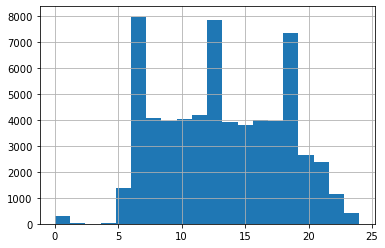

In [15]:
df1['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

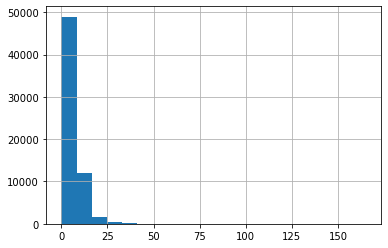

In [16]:
df1['TaxiIn'].hist(bins=20)

<AxesSubplot:>

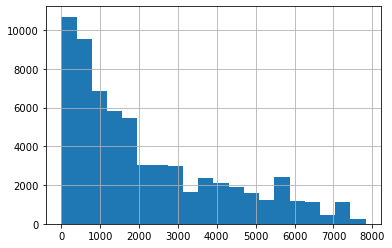

In [17]:
df1['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [18]:
def transform_data(data):
    new_data = data.copy()
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    new_data[numeric_cols] = new_data[numeric_cols].fillna(0)
    new_data[numeric_cols] = StandardScaler().fit_transform(new_data[numeric_cols])
    for feature in data.select_dtypes(include=['object']).columns:
        new_data[feature].fillna('nan')
    new_data = pd.get_dummies(new_data)
    return new_data

In [20]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [21]:
df2 = transform_data(df1)

In [22]:
df2.head()

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,...,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,CancellationCode_A,CancellationCode_B,CancellationCode_C
0,-0.113219,0.257061,-0.463346,-0.995271,-0.928844,-0.915024,-0.805272,-0.017261,0.152938,-0.740878,...,0,0,0,0,0,0,0,0,0,0
1,-0.113219,-1.332356,-0.463346,0.099383,-0.001742,0.132265,0.095951,-0.172303,0.152938,0.189993,...,0,0,0,0,0,0,0,0,0,0
2,0.471302,-1.445885,1.540371,-0.213449,0.191981,0.376154,0.343061,-0.714949,-0.351420,0.477909,...,0,0,0,0,0,0,0,0,0,0
3,-1.574522,0.824710,-0.463346,0.827446,-0.306164,-0.255089,-0.325589,-0.534067,-0.379439,-0.343447,...,0,0,0,0,0,0,0,0,0,0
4,-0.405479,-1.332356,1.540371,-0.914887,0.330354,0.447886,0.502955,-0.663269,-0.435479,0.642180,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df2.columns
print('Кол-во признаков:', len(df2.columns))

Кол-во признаков: 641


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [25]:
x_tr, x_te, y_tr, y_te = train_test_split(df2.drop('DepDelay', axis=1), df2.DepDelay, test_size=0.3)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
lr = LinearRegression()
lr.fit(x_tr.iloc[:1000], y_tr[:1000])

LinearRegression()

In [28]:
x_tr.iloc[:1000].shape, y_tr[:1000].shape

((1000, 640), (1000,))

In [29]:
mse_tr = mean_squared_error(lr.predict(x_tr.iloc[:1000]), y_tr[:1000])
mse_te = mean_squared_error(lr.predict(x_te), y_te)

r2_tr = r2_score(lr.predict(x_tr.iloc[:1000]), y_tr[:1000])
r2_te = r2_score(lr.predict(x_te), y_te)

print(f'MSE train: {mse_tr:.2f}\nMSE test: {mse_te:.2f}')
print(f'R2 train: {r2_tr:.2f}\nR2 test: {r2_te:.2f}')

MSE train: 0.01
MSE test: 957196914850104320.00
R2 train: 0.99
R2 test: -0.09


In [30]:
lr.coef_.mean() # Модель переобучилась

1350279652.1197884

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18.** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [31]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import KFold

In [32]:
subset_x = x_tr[:1000]
subset_y = y_tr[:1000]

kf = KFold(n_splits=5)

lasso_cv = LassoCV()
ridge_cv = RidgeCV()

lasso_cv.fit(subset_x, subset_y)
print(f'Best alpha for Lasso: {lasso_cv.alpha_}')

ridge_cv.fit(subset_x, subset_y, )
print(f'Best alpha for Ridge: {ridge_cv.alpha_}')

C:\Users\Bodym\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12583788207222213, tolerance: 0.1238489950737494
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Bodym\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08050190045479155, tolerance: 0.0800759974045722
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Bodym\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08763635019228744, tolerance: 0.0800759974045722
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Bodym\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

Best alpha for Lasso: 0.0024095321924394175
Best alpha for Ridge: 1.0


In [33]:
mse_tr = mean_squared_error(lasso_cv.predict(x_tr.iloc[:1000]), y_tr[:1000])
mse_te = mean_squared_error(lasso_cv.predict(x_te), y_te)

r2_tr = r2_score(lasso_cv.predict(x_tr.iloc[:1000]), y_tr[:1000])
r2_te = r2_score(lasso_cv.predict(x_te), y_te)

print(f'MSE train (lasso): {mse_tr:.2f}\nMSE test: {mse_te:.2f}')
print(f'R2 train (lasso): {r2_tr:.2f}\nR2 test: {r2_te:.2f}')


mse_tr = mean_squared_error(ridge_cv.predict(x_tr.iloc[:1000]), y_tr[:1000])
mse_te = mean_squared_error(ridge_cv.predict(x_te), y_te)

r2_tr = r2_score(ridge_cv.predict(x_tr.iloc[:1000]), y_tr[:1000])
r2_te = r2_score(ridge_cv.predict(x_te), y_te)

print(f'MSE train (ridge): {mse_tr:.2f}\nMSE test: {mse_te:.2f}')
print(f'R2 train (ridge): {r2_tr:.2f}\nR2 test: {r2_te:.2f}')

MSE train (lasso): 0.02
MSE test: 0.06
R2 train (lasso): 0.99
R2 test: 0.94
MSE train (ridge): 0.01
MSE test: 0.06
R2 train (ridge): 0.99
R2 test: 0.94


In [ ]:
Добавление регуляризации позволило решить проблему переобучения

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19.** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [34]:
x_tr['unit_feature'] = 1
x_te['unit_feature'] = 1

**20.** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [71]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return w.dot(X.T)

In [72]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pred = make_pred(X, w)
    perc = (y - pred) / (y + 1e-7)
    return np.mean(np.square(perc))

In [73]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    y_pred = make_pred(X, w)
    loss = y_pred - y
    z = (loss / (y + 1e-7) / (y + 1e-7)).dot(X)
    return 2 * z / X.shape[0]

In [74]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pred = make_pred(X, w)
    perc = (y - pred) / (y + 1e-7)
    return np.mean(np.square(perc)) + np.linalg.norm(w)

In [75]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    y_pred = make_pred(X, w)
    loss = y_pred - y
    z = (loss / (y + 1e-7) / (y + 1e-7)).dot(X)
    return 2 * z / X.shape[0] + w / X.shape[0]

**21.** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [76]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg, verbose=False):
    if is_reg:
        f_cost = get_reg_func
        f_grad = get_reg_grad
    else:
        f_cost = get_func
        f_grad = get_grad
    
    w = w0.copy()
    history = []
    w_prev = None
    success = True
    for i in range(max_iter):
        if w_prev is not None and np.linalg.norm(w_prev - w) < eps:
            break
        mpse = f_cost(w, X, y)
        history.append(mpse)
        
        mpse_grad = f_grad(w, X, y)
        # обновить веса
        w_prev = w.copy()
        w = w - step_size * mpse_grad
        if verbose:
            print(f'{i}: {mpse:.3f}')
        
        if i > 1 and mpse > 1e6:
            print('Алгоритм не сходится')
            success = False
            break
    return w, history, success

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [84]:
w = np.random.rand(x_tr.shape[1])
_, history, _ = grad_descent(x_tr, y_tr, w, 1e-3, 500, 1e-3, False, True)

0: 77773.693
1: 18887948158.677
2: 4753312455594586.000
Алгоритм не сходится


In [85]:
hists = []
for lr in [10, 1, 0.001]:
    w = np.random.rand(x_tr.shape[1])
    _, history, success = grad_descent(x_tr, y_tr, w, lr, 50, 1e-5, False, False)
    hists.append(('rand', lr, success, history))
    print(f'Complete training with random weights init for lr {lr}')
    w = np.zeros(x_tr.shape[1])
    _, history, success = grad_descent(x_tr, y_tr, w, lr, 50, 1e-5, False, False)
    hists.append(('zero', lr, success, history))
    print(f'Complete training with zero weights init for lr {lr}')

Алгоритм не сходится
Complete training with random weights init for lr 10
Алгоритм не сходится
Complete training with zero weights init for lr 10
Алгоритм не сходится
Complete training with random weights init for lr 1
Алгоритм не сходится
Complete training with zero weights init for lr 1
Алгоритм не сходится
Complete training with random weights init for lr 0.001
Алгоритм не сходится
Complete training with zero weights init for lr 0.001


In [86]:
from matplotlib import pyplot as plt

**22.** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23.**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

**24.** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

**25.** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?